<a href="https://colab.research.google.com/github/MinsooKwak/Kaggle_note/blob/main/Data_science/Netflix_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Story-Telling with Netflix

[이유한님의 kaggle notebook](https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver/notebook)을 참고하였습니다.

### 기본 설정 및 준비

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

# 경고를 무시합니다.
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(f'numpy      : {np.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'seaborn    : {sns.__version__}')
print(f'matplotlib : {mpl.__version__}')

numpy      : 1.19.5
pandas     : 1.3.5
seaborn    : 0.11.2
matplotlib : 3.2.2


깨끗한 시각화를 위해 matplotlib config를 설정합니다.

In [3]:
plt.rc('font', size=12)           # 기본 텍스트 사이즈를 설정
plt.rc('axes', titlesize=14)      # title font size 설정
plt.rc('axes', labelsize=12)      # 축의 font size 설정
plt.rc('xtick', labelsize=12)     # x축 tick labels size 설정
plt.rc('ytick', labelsize=12)     # y축 tick labels size 설정
plt.rc('legend', fontsize=12)     # legend fontsize
plt.rc('figure', titlesize=14)    # figure title의 fontsize
plt.rcParams['figure.dpi'] = 300  # 높은 해상도
sns.set_style('whitegrid')

### 데이터 import

구글 드라이브를 통해 데이터를 불러오겠습니다.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/kaggle/netflix/

/content/drive/MyDrive/kaggle/netflix


현재 위치에 있는 파일을 확인합니다.

In [6]:
ls

netflix_titles.csv


In [7]:
df = pd.read_csv('netflix_titles.csv')
df.shape

(7787, 12)

### 데이터 결측치 확인

missingno 라이브러리를 사용하여 결측된 데이터를 시각적으로 확인합니다. (seaborn의 heatmap을 통한 시각화도 가능합니다.)

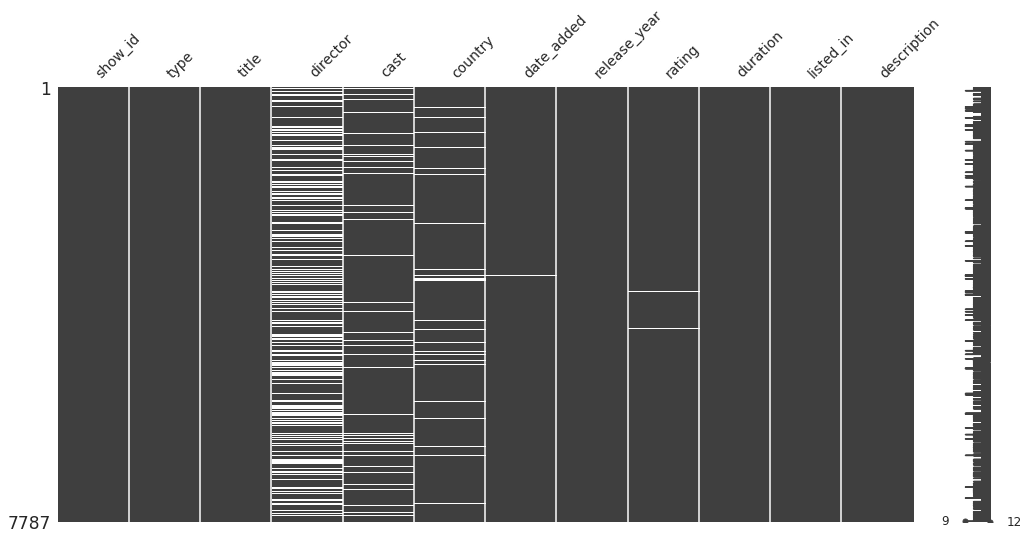

In [8]:
%matplotlib inline
msno.matrix(df, figsize=(17,8), fontsize=14);

[missingno 듀토리얼](https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python)

bar 그래프를 통해 결측치의 비율 역시 시각화 할 수 있습니다.

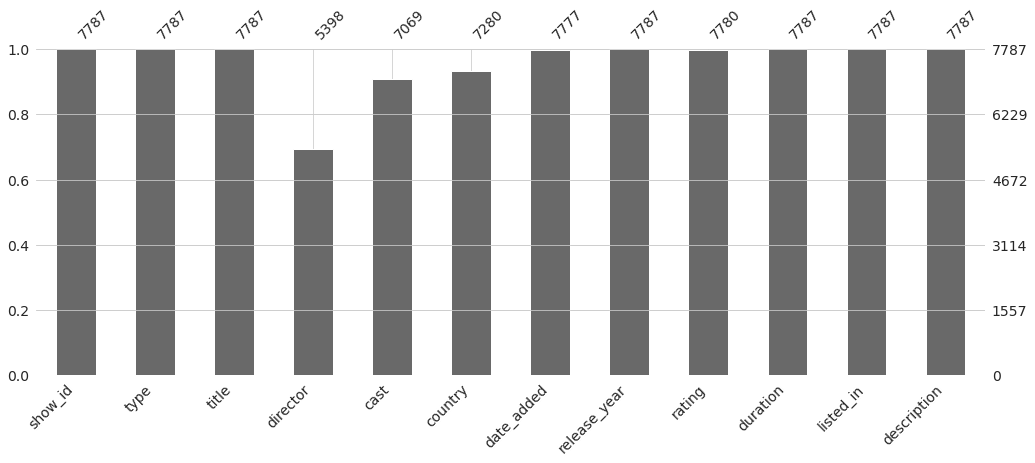

In [9]:
msno.bar(df, figsize=(17,6), fontsize=14);

정확한 결측치의 비율을 확인해보겠습니다.

In [10]:
for i in df.columns:
  null_rate = df[i].isna().sum() / len(df)*100
  if null_rate > 0:
    print(f"{i}'s null rate : {null_rate.round(2)}%")

director's null rate : 30.68%
cast's null rate : 9.22%
country's null rate : 6.51%
date_added's null rate : 0.13%
rating's null rate : 0.09%


많은 결측치를 포함한 데이터:

- director : 작품을 많이 찍은 감독만 따로 시각화 할 수 있을 것 같습니다.
- cast     : 인원수로 바꿔본다면 0으로 가정해볼 수 있습니다.
- country  : country 역시 None으로 생각합니다.

### 데이터를 더 살펴봅니다.

In [11]:
print(f'현재{df.shape[0]}개의 비디오가 있고, 각각 {df.shape[1]}개의 feature를 갖고 있습니다.')

현재7787개의 비디오가 있고, 각각 12개의 feature를 갖고 있습니다.


In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


count, unique, frequent를 확인합니다.

In [13]:
df.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3


show_id와 description은 당장 시각화 할 것이 없어 보입니다.

show_id를 가지고 EDA를 통한 show_id의 특성을 찾아낼 수 있습니다.

description은 country에 따라, 연도의 변화에 따라 시각화하거나, wordcloud를 이용할 수 있습니다.

In [27]:
df = df.fillna('NULL')  #  결측치에 대해 'NULL'로 대체하였습니다.
df['date_added'] = df['date_added'].apply(lambda x: x.split(',')[-1])             # date를 , 기준으로 split하여 맨 뒤의 연도 데이터만 남겼습니다.
df['date_added'] = df['date_added'].apply(lambda x: x if x != 'NULL' else '2021') # NULL인 데이터에 2021을 채웁니다.
df['date_added'] = df['date_added'].apply(int)                                    # date_added 에 int를 적용시킵니다.

시각화를 위해 movie data와 TV show data를 만듭니다.

In [28]:
movie = df[df['type']=='Movie']
tv_show = df[df['type']=='TV Show']

Netflix가 film/ drama 영역에서 가장 큰 기업임이 분명해졌습니다.

이번에는 Netflix가 어떻게 자랐고, data 상에서 어떻게 보이는지 wikipedia를 통해 알아보겠습니다.

[넷플릭스 | 위키피디아](https://en.wikipedia.org/wiki/Netflix)

[넷플릭스 타임라인 | 위키피디아](https://en.wikipedia.org/wiki/Timeline_of_Netflix)